In [109]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [110]:
data_csv = pd.read_csv('dataset/Fruit Sales Data.csv')
data_csv

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Apple,44.0,72000.0,No
1,Mango,27.0,48000.0,Yes
2,Orange,30.0,54000.0,No
3,Strawberry,38.0,61000.0,No
4,Orange,40.0,NaN,Yes
5,Mango,35.0,58000.0,Yes
6,Apple,NaN,52000.0,No
7,Strawberry,48.0,79000.0,Yes
8,Strawberry,50.0,83000.0,No
9,Apple,37.0,67000.0,Yes


In [111]:
data_csv_jogja = pd.read_csv('dataset/Fruit Sales Data Branch Jogja.csv')
data_csv_jogja

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased
0,Durian,40,79000.0,Yes
1,Melon,10,83000.0,Yes
2,Apple,47,67000.0,Yes
3,Orange,70,63000.0,No
4,Melon,59,NaN,Yes
5,Durian,40,76000.0,Yes
6,Melon,20,34000.0,No
7,Avocado,21,38500.0,Yes
8,Apple,24,38000.0,Yes


In [112]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Fruit_Name    16 non-null     object 
 1   Weight_in_Kg  14 non-null     float64
 2   Total_Cost    14 non-null     float64
 3   Purchased     16 non-null     object 
dtypes: float64(2), object(2)
memory usage: 644.0+ bytes


In [113]:
data_csv.describe()

,Weight_in_Kg,Total_Cost
count,14.000000,14.000000
mean,38.142857,58821.428571
std,8.328423,15688.809269
min,24.000000,34000.000000
25%,31.250000,49000.000000
50%,38.500000,59500.000000
75%,45.500000,70750.000000
max,50.000000,83000.000000


In [114]:
data_csv.isnull().sum()

Fruit_Name      0
Weight_in_Kg    2
Total_Cost      2
Purchased       0
dtype: int64

In [115]:
data_csv['Fruit_Name'].value_counts()

Fruit_Name
Apple         4
Mango         4
Orange        4
Strawberry    4
Name: count, dtype: int64

In [116]:
data_csv_jogja['Fruit_Name'].value_counts()

Fruit_Name
Melon      3
Durian     2
Apple      2
Orange     1
Avocado    1
Name: count, dtype: int64

In [117]:
data_csv_jogja['Branch'] = 'Jogja'
data_csv['Branch'] = 'ALL'
data_csv_combined = pd.concat([data_csv, data_csv_jogja], ignore_index=True)
data_csv_combined

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased,Branch
0,Apple,44.0,72000.0,No,ALL
1,Mango,27.0,48000.0,Yes,ALL
2,Orange,30.0,54000.0,No,ALL
3,Strawberry,38.0,61000.0,No,ALL
4,Orange,40.0,NaN,Yes,ALL
5,Mango,35.0,58000.0,Yes,ALL
6,Apple,NaN,52000.0,No,ALL
7,Strawberry,48.0,79000.0,Yes,ALL
8,Strawberry,50.0,83000.0,No,ALL
9,Apple,37.0,67000.0,Yes,ALL


In [118]:
data_csv_combined = data_csv_combined.dropna(subset=["Fruit_Name", "Weight_in_Kg", "Total_Cost", "Purchased"])
data_csv_combined

,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased,Branch
0,Apple,44.0,72000.0,No,ALL
1,Mango,27.0,48000.0,Yes,ALL
2,Orange,30.0,54000.0,No,ALL
3,Strawberry,38.0,61000.0,No,ALL
5,Mango,35.0,58000.0,Yes,ALL
7,Strawberry,48.0,79000.0,Yes,ALL
8,Strawberry,50.0,83000.0,No,ALL
9,Apple,37.0,67000.0,Yes,ALL
10,Orange,47.0,63000.0,No,ALL
12,Mango,46.0,76000.0,No,ALL


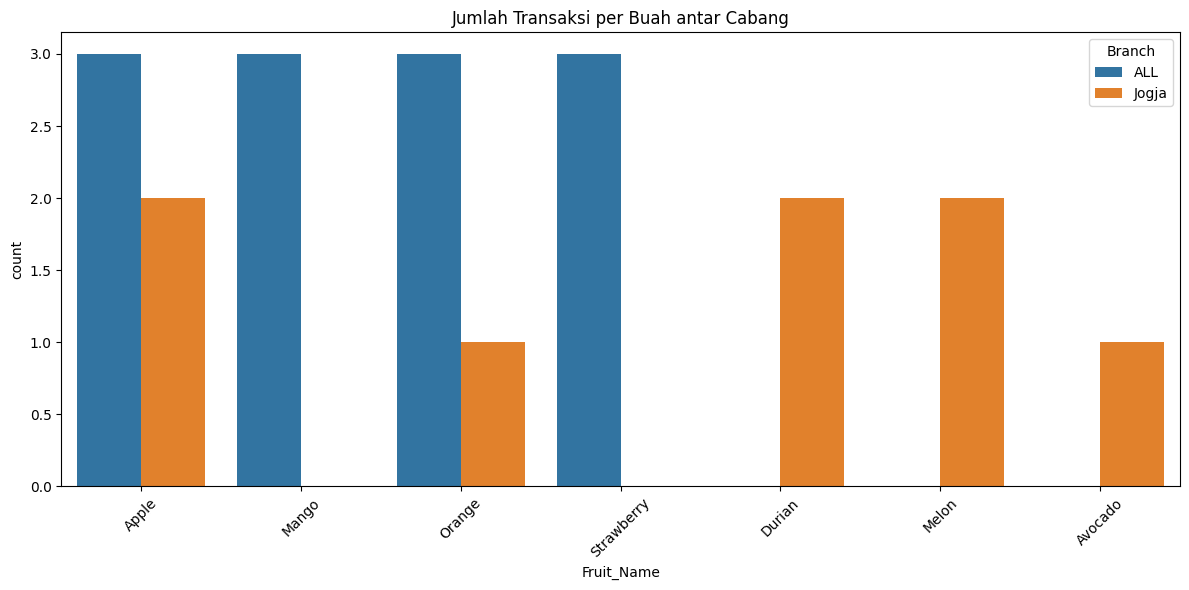

In [119]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data_csv_combined, x='Fruit_Name', hue='Branch')
plt.title("Jumlah Transaksi per Buah antar Cabang")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [120]:
avg_stats = data_csv_combined.groupby(['Branch', 'Fruit_Name'])[['Total_Cost', 'Weight_in_Kg']].mean().reset_index()

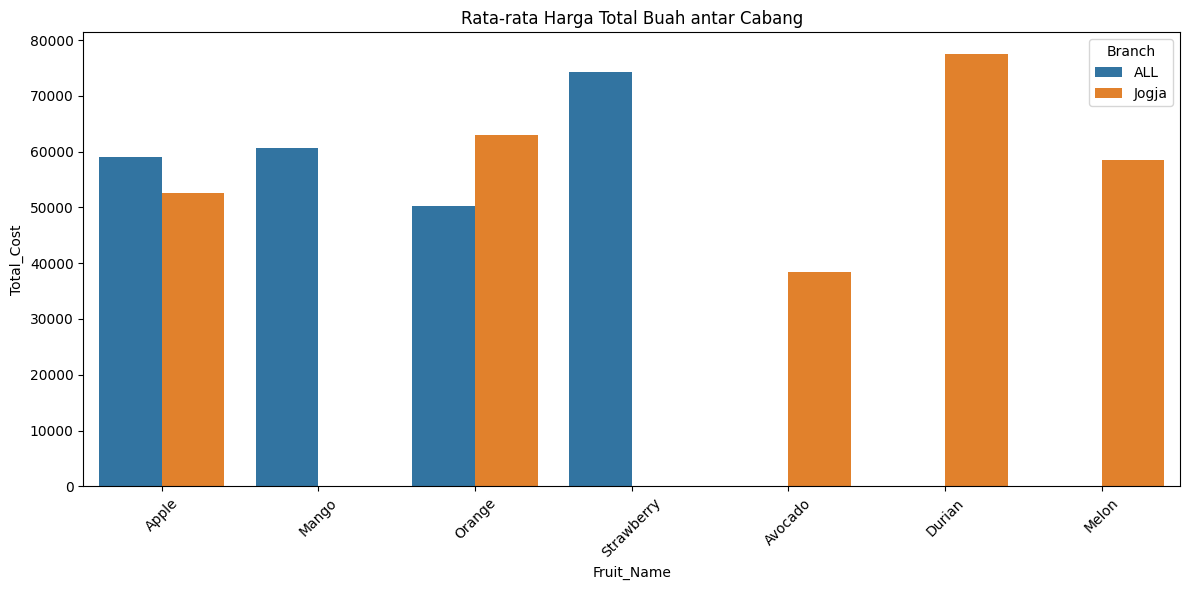

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_stats, x='Fruit_Name', y='Total_Cost', hue='Branch')
plt.title("Rata-rata Harga Total Buah antar Cabang")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

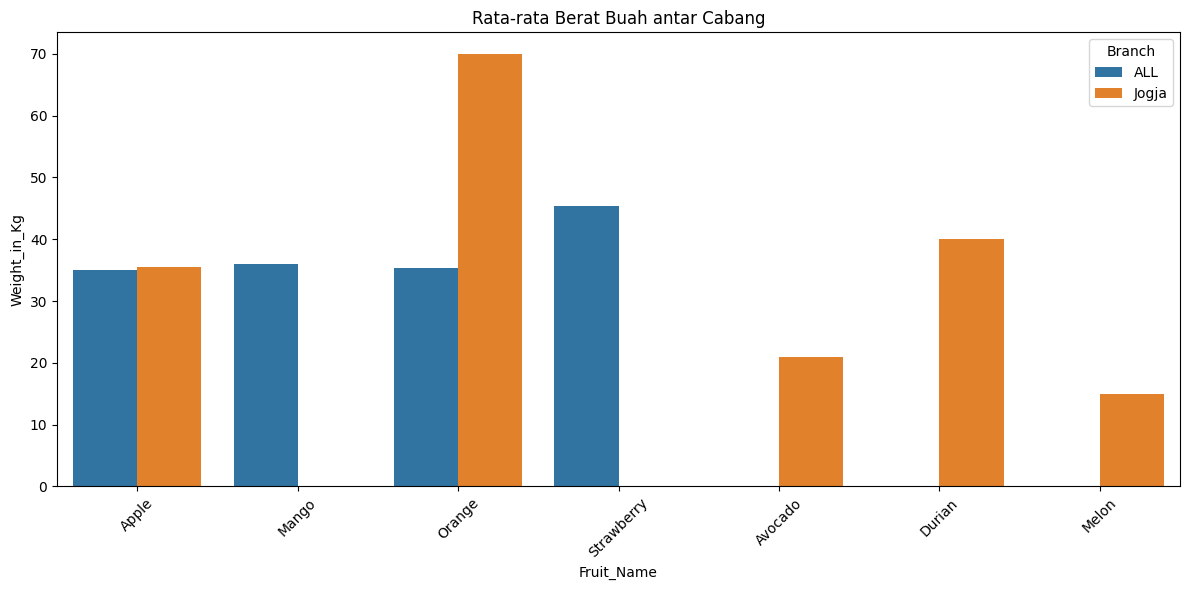

In [122]:
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_stats, x='Fruit_Name', y='Weight_in_Kg', hue='Branch')
plt.title("Rata-rata Berat Buah antar Cabang")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

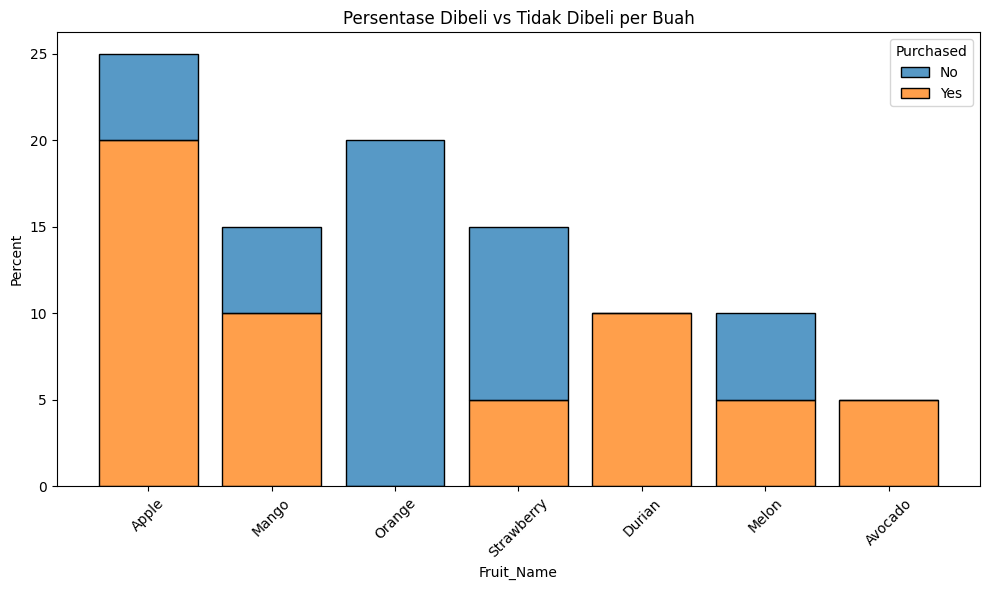

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_csv_combined, x="Fruit_Name", hue="Purchased", multiple="stack", shrink=0.8, stat="percent", discrete=True)
plt.title("Persentase Dibeli vs Tidak Dibeli per Buah")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

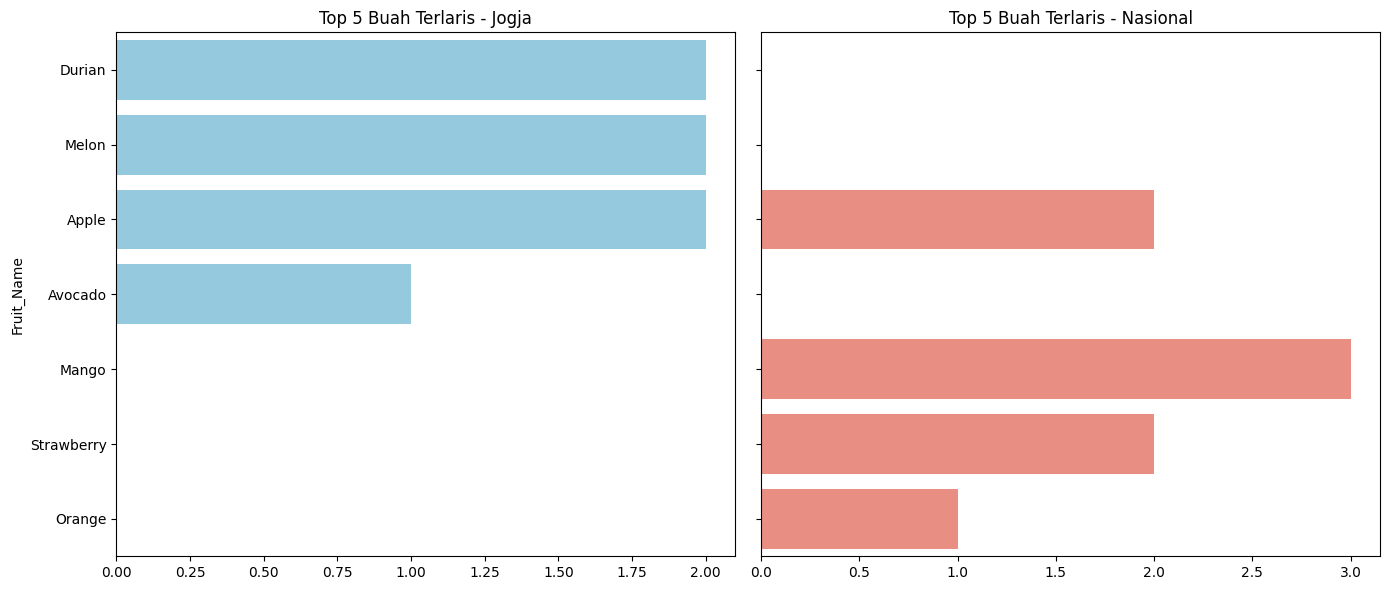

In [124]:
top_fruits_jogja = data_csv_jogja[data_csv_jogja["Purchased"] == "Yes"]['Fruit_Name'].value_counts().nlargest(5)
top_fruits_all = data_csv[data_csv["Purchased"] == "Yes"]['Fruit_Name'].value_counts().nlargest(5)

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.barplot(x=top_fruits_jogja.values, y=top_fruits_jogja.index, ax=axes[0], color="skyblue")
axes[0].set_title("Top 5 Buah Terlaris - Jogja")

sns.barplot(x=top_fruits_all.values, y=top_fruits_all.index, ax=axes[1], color="salmon")
axes[1].set_title("Top 5 Buah Terlaris - Nasional")

plt.tight_layout()
plt.show()

In [125]:
data_csv_combined["Purchased"].value_counts()

Purchased
Yes    11
No      9
Name: count, dtype: int64

In [126]:
from sdv.single_table import CTGANSynthesizer
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data_csv_combined)

model = CTGANSynthesizer(metadata)
model.fit(data_csv_combined)
synthetic_data = model.sample(1000)
synthetic_data

/opt/homebrew/lib/python3.12/site-packages/sdv/single_table/base.py:145: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/opt/homebrew/lib/python3.12/site-packages/sdv/single_table/base.py:123: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,Fruit_Name,Weight_in_Kg,Total_Cost,Purchased,Branch
0,Apple,62.0,83000.0,Yes,ALL
1,Durian,57.0,47327.0,Yes,ALL
2,Orange,70.0,83000.0,Yes,Jogja
3,Apple,59.0,73587.0,No,Jogja
4,Strawberry,70.0,83000.0,Yes,ALL
...,...,...,...,...,...
995,Apple,70.0,81667.0,Yes,ALL
996,Strawberry,52.0,83000.0,Yes,ALL
997,Orange,23.0,83000.0,Yes,ALL
998,Orange,20.0,83000.0,No,ALL


In [127]:
synthetic_data["Purchased"].value_counts()

Purchased
Yes    538
No     462
Name: count, dtype: int64

Classification Report:
              precision    recall  f1-score   support

          No       0.45      0.33      0.38        91
         Yes       0.54      0.66      0.60       109

    accuracy                           0.51       200
   macro avg       0.49      0.50      0.49       200
weighted avg       0.50      0.51      0.50       200



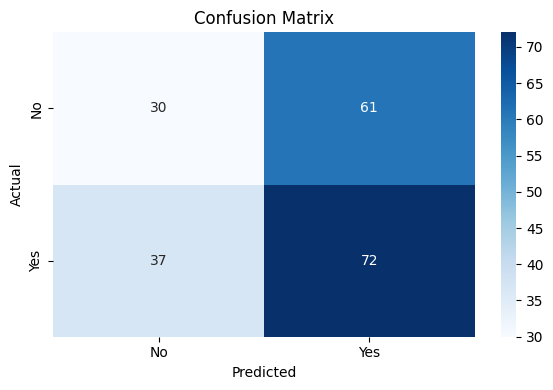

In [128]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

df = synthetic_data

le_fruit = LabelEncoder()
le_branch = LabelEncoder()
le_purchased = LabelEncoder()

df["Fruit_Encoded"] = le_fruit.fit_transform(df["Fruit_Name"])
df["Branch_Encoded"] = le_branch.fit_transform(df["Branch"])
df["Purchased_Encoded"] = le_purchased.fit_transform(df["Purchased"])

X = df[["Weight_in_Kg", "Total_Cost", "Fruit_Encoded", "Branch_Encoded"]]
y = df["Purchased_Encoded"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=le_purchased.classes_))

plt.figure(figsize=(6, 4))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le_purchased.classes_, yticklabels=le_purchased.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()